# European leagues basic analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis and Concultions</a></li>
</ul>

<a id='intro'></a>
## Introduction

One of the most exciting sports all over the world is football. In this report I am going to use my understanding of the Data Analysis processes onto a provided soccerr database from Kaggle. This database contains all information about a number of European leagues, the matches played between seasons of 2008 and 2016 (leagues only), scores, attributes and player information. 

I will use this database and create my own datasets for analysis, I will look on specific criteria for comparison and draw conclusions about them. The approach is basic, pose questions around the load of each league (how many matches per season), compare different attribute variables with the number of wins variable from each team, and finally the average weight and height in these european leagues. Questions posed are titled in the EDA section.

Q1: How many stages (matches each team played) were played in each league for each season?

Q2: How does the team attributes reflect on the number of wins achieved?

Q3: Which teams had the most wins and goals scored?

Q4: How does the height and weight distribution look like for players in the European league?

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


### General Properties

To create a connection to the database, I used the link below to know hoe to run the pandas code for sqlite.
https://stackoverflow.com/questions/50996820/how-to-import-a-sqlite3-database-into-python-jupyter-notebook/50999564
Afterwards I will want to extract the datasets that I will use in my analysis.

In [2]:
#import the database to our kernel
cnx = sqlite3.connect(r'C:\Users\iellawendy\OneDrive - Infor\Training\Data Analyst Nanodegree\Project02ExploreADataset\SQLite DB\database.sqlite')

In [3]:
#I am filtering matches played per season, getting to know if number of matches is consistent as 
chk = pd.read_sql_query('SELECT name,season, COUNT (DISTINCT stage) AS matches FROM Match JOIN League ON Match.league_id = League.id GROUP BY 1,2 ORDER BY 1,2', cnx)
chk.head(2)

,name,season,matches
0,Belgium Jupiler League,2008/2009,34
1,Belgium Jupiler League,2009/2010,30


In [4]:
chk.shape

(88, 3)

In [5]:
chk.describe()

,matches
count,88.000000
mean,34.772727
std,4.450823
min,6.000000
25%,34.000000
50%,36.000000
75%,38.000000
max,38.000000


In [6]:
#Team attributes
team_attr = pd.read_sql_query('SELECT * FROM Team_Attributes ta JOIN Team t ON t.team_api_id = ta.team_api_id ORDER BY 3,4', cnx)
team_attr.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1113,874,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,...,60,Press,50,Normal,Cover,31446,1601,874,Ruch Chorzów,CHO
1,1114,874,1601,2011-02-22 00:00:00,48,Balanced,NaN,Little,51,Mixed,...,48,Press,50,Normal,Cover,31446,1601,874,Ruch Chorzów,CHO


In [7]:
team_attr.shape

(1458, 30)

In [8]:
team_attr.describe()

,id,team_fifa_api_id,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,id,team_api_id,team_fifa_api_id
count,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871,22692.858711,9995.727023,17706.982167
std,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712,15015.159107,13264.869900,39179.857739
min,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000,1.000000,1601.000000,1.000000
25%,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000,9547.250000,8457.750000,110.000000
50%,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000,20524.500000,8674.000000,485.000000
75%,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000,35294.000000,9904.000000,1900.000000
max,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000,50204.000000,274581.000000,112513.000000


In [9]:
#league win rate analysis
lge_id = pd.read_sql_query('SELECT league_id, stage, season, match_api_id, home_team_goal, away_team_goal, CASE  WHEN home_team_goal = away_team_goal THEN "d" WHEN home_team_goal > away_team_goal THEN "w" WHEN home_team_goal < away_team_goal THEN "w" END AS result,CASE WHEN home_team_goal > away_team_goal THEN 1 ELSE 0 END AS home_win, CASE WHEN home_team_goal < away_team_goal THEN 1 ELSE 0 END AS away_win FROM Match ORDER BY 2',cnx)
lge_id.head(2)

,league_id,stage,season,match_api_id,home_team_goal,away_team_goal,result,home_win,away_win
0,1,1,2008/2009,492473,1,1,d,0,0
1,1,1,2008/2009,492474,0,0,d,0,0


In [10]:
lge_id.shape

(25979, 9)

In [11]:
lge_id.describe()

,league_id,stage,match_api_id,home_team_goal,away_team_goal,home_win,away_win
count,25979.000000,25979.000000,2.597900e+04,25979.000000,25979.000000,25979.000000,25979.000000
mean,11738.630317,18.242773,1.195429e+06,1.544594,1.160938,0.458717,0.287386
std,7553.936759,10.407354,4.946279e+05,1.297158,1.142110,0.498302,0.452552
min,1.000000,1.000000,4.831290e+05,0.000000,0.000000,0.000000,0.000000
25%,4769.000000,9.000000,7.684365e+05,1.000000,0.000000,0.000000,0.000000
50%,10257.000000,18.000000,1.147511e+06,1.000000,1.000000,0.000000,0.000000
75%,17642.000000,27.000000,1.709852e+06,2.000000,2.000000,1.000000,1.000000
max,24558.000000,38.000000,2.216672e+06,10.000000,9.000000,1.000000,1.000000


In [12]:
#match results
mtch = pd.read_sql_query('WITH t1 AS(SELECT league_id, name, season, stage, match_api_id, home_team_api_id, team_short_name AS home_short, team_long_name AS home_long, away_team_api_id, home_team_goal, away_team_goal FROM Match m JOIN League l ON l.id = m.league_id JOIN Team t ON m.home_team_api_id = t.team_api_id), t2 AS (SELECT * FROM Team) SELECT league_id, name, season, stage, match_api_id, home_short, home_long, team_short_name AS away_short, team_long_name AS away_long, home_team_goal, away_team_goal FROM t1 JOIN t2 ON t2.team_api_id = t1.away_team_api_id',cnx)
mtch.head(2)

,league_id,name,season,stage,match_api_id,home_short,home_long,away_short,away_long,home_team_goal,away_team_goal
0,1,Belgium Jupiler League,2008/2009,1,492473,GEN,KRC Genk,BAC,Beerschot AC,1,1
1,1,Belgium Jupiler League,2008/2009,1,492474,ZUL,SV Zulte-Waregem,LOK,Sporting Lokeren,0,0


In [13]:
mtch.shape

(25979, 11)

In [14]:
#Player height data
pl = pd.read_sql_query('SELECT player_name, height, ROUND(weight*0.453592,2) AS weight FROM Player', cnx)
pl.head(2)

,player_name,height,weight
0,Aaron Appindangoye,182.88,84.82
1,Aaron Cresswell,170.18,66.22


In [15]:
pl.shape

(11060, 3)

In [16]:
pl.describe()

,height,weight
count,11060.000000,11060.000000
mean,181.867445,76.375393
std,6.369201,6.799564
min,157.480000,53.070000
25%,177.800000,72.120000
50%,182.880000,76.200000
75%,185.420000,81.190000
max,208.280000,110.220000


the 'mtch' and 'lge_id' datasets are the same reflection, the only differentiation here is that I divided my win/draw identifiers in the 'lge_id' dataset (These datasets will be cleansed and merged later). 

Player data used in this analysis show no problems. Now checking for null values in my datasets. describtions of the datasets do not report any abnormal values, which is good.

In [17]:
chk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
name       88 non-null object
season     88 non-null object
matches    88 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


In [18]:
team_attr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 30 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In [19]:
lge_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 9 columns):
league_id         25979 non-null int64
stage             25979 non-null int64
season            25979 non-null object
match_api_id      25979 non-null int64
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
result            25979 non-null object
home_win          25979 non-null int64
away_win          25979 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.8+ MB


In [20]:
mtch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
league_id         25979 non-null int64
name              25979 non-null object
season            25979 non-null object
stage             25979 non-null int64
match_api_id      25979 non-null int64
home_short        25979 non-null object
home_long         25979 non-null object
away_short        25979 non-null object
away_long         25979 non-null object
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
dtypes: int64(5), object(6)
memory usage: 2.2+ MB


In [21]:
pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 3 columns):
player_name    11060 non-null object
height         11060 non-null float64
weight         11060 non-null float64
dtypes: float64(2), object(1)
memory usage: 259.3+ KB


In [22]:
chk.duplicated().sum(), team_attr.duplicated().sum(), lge_id.duplicated().sum(), mtch.duplicated().sum(), pl.duplicated().sum()

(0, 0, 0, 0, 2)

It seems that the only dataset that has an issue is the 'team_attr'. the column 'buildUpPlayDribbling' has two thirds of the data missing. Please note that I will disregard this column from any analysis as it will not be reliant in any EDA, even if we filled the null values with averages. 

Moreover, observation in our data is that there are no duplicates (seems natural as each value set in any table in the database will always remain unique), any unnecessary columns in the datasets will be removed. Finally the player attributes show a duplicated value that I will need to remove before analysing the data.

### Null handling, columns dropping, merging data

I used the below link to drop duplicated columns in my dataset(s)
https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns

#### Team attributes dataset 'team_attr'

In [23]:
#drop duplicated columns in team_attr
team_attr = team_attr.loc[:,~team_attr.columns.duplicated()]
#drop the extra columns
team_attr.drop(columns = ['id', 'team_fifa_api_id', 'team_short_name'], axis = 1, inplace = True)

In [24]:
team_attr.head(2)

,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name
0,1601,2010-02-22 00:00:00,30,Slow,NaN,Little,40,Mixed,Organised,50,...,Lots,Organised,65,Medium,60,Press,50,Normal,Cover,Ruch Chorzów
1,1601,2011-02-22 00:00:00,48,Balanced,NaN,Little,51,Mixed,Organised,68,...,Normal,Organised,46,Medium,48,Press,50,Normal,Cover,Ruch Chorzów


In [25]:
# Get The means of the team attributes to be ready for merging, this is going to be excellent to measure variables together
mean_attr= team_attr.groupby(['team_long_name']).mean()
mean_attr.head(2)

,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_long_name,,,,,,,,,,
1. FC Kaiserslautern,8350.0,51.166667,51.0,51.666667,47.166667,62.000000,59.666667,46.833333,52.833333,55.166667
1. FC Köln,8722.0,57.333333,50.0,61.166667,55.166667,41.666667,59.000000,45.000000,51.166667,60.833333


#### Leagues result dataset 'lge_id' columns drop and merge to mtch

In [26]:
#drop columns in lge_id
lge_id.drop(['league_id', 'season', 'stage', 'home_team_goal', 'away_team_goal'], axis = 1, inplace = True)

In [27]:
lge_id.head(2)

,match_api_id,result,home_win,away_win
0,492473,d,0,0
1,492474,d,0,0


In [28]:
#merge the datasets
df = mtch.merge(lge_id, left_on = 'match_api_id', right_on = 'match_api_id', how = 'inner')
df.head(2)

,league_id,name,season,stage,match_api_id,home_short,home_long,away_short,away_long,home_team_goal,away_team_goal,result,home_win,away_win
0,1,Belgium Jupiler League,2008/2009,1,492473,GEN,KRC Genk,BAC,Beerschot AC,1,1,d,0,0
1,1,Belgium Jupiler League,2008/2009,1,492474,ZUL,SV Zulte-Waregem,LOK,Sporting Lokeren,0,0,d,0,0


In [29]:
#drop unecessary columns
df.drop(['league_id', 'match_api_id', 'home_short', 'away_short'], axis = 1, inplace = True)

In [30]:
df.head(2)

,name,season,stage,home_long,away_long,home_team_goal,away_team_goal,result,home_win,away_win
0,Belgium Jupiler League,2008/2009,1,KRC Genk,Beerschot AC,1,1,d,0,0
1,Belgium Jupiler League,2008/2009,1,SV Zulte-Waregem,Sporting Lokeren,0,0,d,0,0


#### Removing the duplicates
I will remove the duplicates found in the player data

In [31]:
#drop the duplicates, for good
pl.drop_duplicates(inplace = True)

In [32]:
#Do another check
pl.duplicated().sum()

0

#### Now for making my subsets
I want to have a dataset with the wins by each team along the seasons in order to be able to merge it with other data sets. Then in the EDA section, it will only be for plotting and reporting.

In [33]:
#create a dataset having wins and total goals scored
#drop coloumns of the home data
dfh = df.drop(['away_long', 'away_team_goal','stage', 'name', 'result','away_win'], axis = 1)
#rename my columns
dfh.rename(columns={"home_long": "team", "home_team_goal": "goals_scored", 'home_win':'win'}, inplace= True)
dfh.head(2)

,season,team,goals_scored,win
0,2008/2009,KRC Genk,1,0
1,2008/2009,SV Zulte-Waregem,0,0


In [34]:
#drop coloumns of the away data
dfa = df.drop(['home_long', 'home_team_goal','home_win','stage', 'name', 'result','home_win'], axis = 1)
#rename my columns
dfa.rename(columns={"away_long": "team", "away_team_goal": "goals_scored", 'away_win':'win'}, inplace= True)
dfa.head(2)

,season,team,goals_scored,win
0,2008/2009,Beerschot AC,1,0
1,2008/2009,Sporting Lokeren,0,0


In [35]:
#merge my data
df_1 = dfa.append(dfh)

In [36]:
df_1 = df_1.groupby(['team'], as_index = False).sum()
df_1.head(2)

,team,goals_scored,win
0,1. FC Kaiserslautern,72,17
1,1. FC Köln,226,60


In [37]:
combined = mean_attr.merge(df_1, left_on = 'team_long_name', right_on = 'team', how = 'inner')
combined.head(2)

,team_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,team,goals_scored,win
0,8350.0,51.166667,51.0,51.666667,47.166667,62.000000,59.666667,46.833333,52.833333,55.166667,1. FC Kaiserslautern,72,17
1,8722.0,57.333333,50.0,61.166667,55.166667,41.666667,59.000000,45.000000,51.166667,60.833333,1. FC Köln,226,60


<a id='eda'></a>
## Exploratory Data Analysis and Conclusions

Now that I made all the necessary cleansing to my data I can start my EDA process. Questions being posed here will analyze results I have gathered in order to build a nice, structured analytical report

### Q1: How many stages (matches each team played) were played in each league for each season?

In Europe, leagues do not have a fixed number of teams in the table, one league can have 20 teams and another has 18. This is strictly due to league brand, budget restrictions, UEFA regulations, and many more reasons, it will be quite beneficial to understand the intensity of each league on a single team. Specially if this team is involved in any other international competition (such as UEFA Champions league). 

In [38]:
#grouping 'chk' dataset
chk_1 = chk.groupby(['name','season']).sum()
chk_1.head(2)

matches
name                   season            
Belgium Jupiler League 2008/2009       34
                       2009/2010       30

I added a feature from the link below to let the legend appear out of the chart
https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas

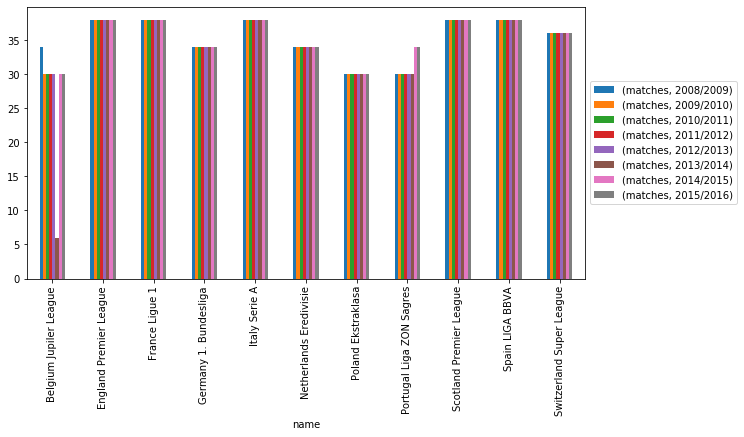

In [39]:
#plot the findings
chk_1.unstack().plot(kind = 'bar', figsize = (10,5), legend = False);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

5 leagues have 38 stages per season which are the top demanding leagues for any given club. The Belgium Jpiler League changed the number of teams per league season after 2008/2009 season, that is why you see the values as less, also the data seems to be missing matches from the 2014/2015 season. According to https://www.fctables.com/belgium/jupiler-league/2010_2011/. Also the same happened with Portugal Liga ZON Sagres, as they changed the number of teams in the league per season starting from 2014/2015 season.

### Q2: How does the team attributes reflect on the number of wins achieved?
Attributes here are one variable each compared to our main variable that concerns any team, the number of won matches!
Here I will disregard one attribute, the 'buildUpPlayDribbling', as it would be unfair comparison given that already two thirds of the data is not there and interpreting them on an average or based on class will not bring in accuracy to the analysis

In [40]:
#add variables as arrays to make the scatter
a = combined['chanceCreationShooting']
b = combined['chanceCreationCrossing']
c = combined['chanceCreationPassing']
d = combined['win']
x = combined['buildUpPlaySpeed']
m = combined['buildUpPlayPassing']
f = combined['defencePressure']
g = combined['defenceAggression']
h = combined['defenceTeamWidth']

use this guide https://towardsdatascience.com/subplots-in-matplotlib-a-guide-and-tool-for-planning-your-plots-7d63fa632857

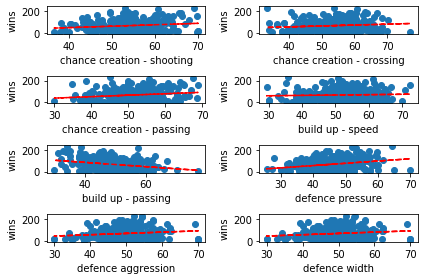

In [41]:
#plot the scatter
plt.subplot(421)
plt.scatter(a, d)
plt.xlabel('chance creation - shooting')
plt.ylabel('wins')
z = np.polyfit(a, d, 1)
p = np.poly1d(z)
plt.plot(a,p(a),"r--")

plt.subplot(422)
plt.scatter(b, d)
plt.xlabel('chance creation - crossing')
plt.ylabel('wins')
z = np.polyfit(b, d, 1)
p = np.poly1d(z)
plt.plot(b,p(b),"r--")

plt.subplot(423)
plt.scatter(c, d)
plt.xlabel('chance creation - passing')
plt.ylabel('wins')
z = np.polyfit(c, d, 1)
p = np.poly1d(z)
plt.plot(c,p(c),"r--")

plt.subplot(424)
plt.scatter(x, d)
plt.xlabel('build up - speed')
plt.ylabel('wins')
z = np.polyfit(x, d, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.subplot(425)
plt.scatter(m, d)
plt.xlabel('build up - passing')
plt.ylabel('wins')
z = np.polyfit(m, d, 1)
p = np.poly1d(z)
plt.plot(m,p(m),"r--")

plt.subplot(426)
plt.scatter(f, d)
plt.xlabel('defence pressure')
plt.ylabel('wins')
z = np.polyfit(f, d, 1)
p = np.poly1d(z)
plt.plot(f,p(f),"r--")

plt.subplot(427)
plt.scatter(g, d)
plt.xlabel('defence aggression')
plt.ylabel('wins')
z = np.polyfit(g, d, 1)
p = np.poly1d(z)
plt.plot(g,p(g),"r--")

plt.subplot(428)
plt.scatter(g, d)
plt.xlabel('defence width')
plt.ylabel('wins')
z = np.polyfit(g, d, 1)
p = np.poly1d(z)
plt.plot(g,p(g),"r--")

plt.tight_layout()
plt.show()

Comparison of the selected team attributes to the total wins achieved show a set of conclusions. There is a positive correlation between attributes and wins, the only difference is that the buildup passing range has a negative correlation with the wins. we can say that the teams who create many chances, speedy buildup and defend in aggression and constant pressure do have the tendency to win matches, as long as to always make sure that their buildup passing range stay in the short side and not attempt long range passing and spread out all over the pitch.

### Q3: Which teams had the most wins and goals scored?
Ranking the top 10 teams, the number of wins is the main to order by, and how many goals scored is followed.
https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html

In [42]:
top = df_1.nlargest(10,['win','goals_scored'])
top

,team,goals_scored,win
75,FC Barcelona,849,234
211,Real Madrid CF,843,228
49,Celtic,695,218
77,FC Bayern Munich,653,193
162,Manchester United,582,192
133,Juventus,543,189
232,SL Benfica,568,185
89,FC Porto,541,183
15,Ajax,647,181
76,FC Basel,619,180


Teams who score more will have the tendency to win more, these are the top ranked teams accross europe. FC Barcelona an Real Madrid look the most successful teams of all throughout the seasons, leaving a trail of more than 140 goals between them and the next top ranked, Celtic.

### Q4: How does the height and weight distribution look like for players in the European league?

In order to see the distribution, a histogram for the height and weight needed. I used the below linkes to draw the mean line.
https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib

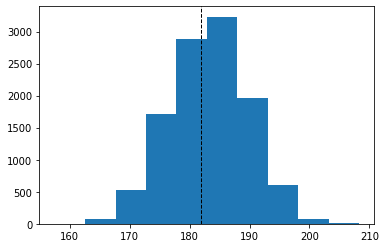

In [43]:
plt.hist(pl['height']);
plt.axvline(pl.mean()['height'], color='k', linestyle='dashed', linewidth=1);

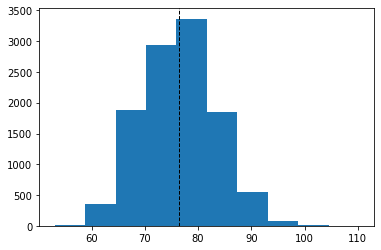

In [44]:
plt.hist(pl['weight']);
plt.axvline(pl.mean()['weight'], color='k', linestyle='dashed', linewidth=1);

In [45]:
#Just extracting the means here
pl.mean()

height    181.866573
weight     76.374563
dtype: float64

Both histograms show a normally distributed histogram. According to https://www.disabled-world.com/calculators-charts/height-chart.php, the average male height in Europe is 177 cm which is less that the average height of the European leagues in hand. The same can be said about the average weight in Europe, which is 71 kg according to https://www.medicalnewstoday.com/articles/320917.php#average-weight-of-men-in-the-us, this is around 5 kgs less than my findings.

We can account this variation to 2 factors, atheletes have a different body structure than the average, and more importantly, these leagues have different players from different other nations and continents.

I would like to acknowledge the work fond in the below link for giving me influence about the work in this project
https://www.kaggle.com/pavanraj159/european-football-data-analysis